In [0]:
!pip3 install kaggle

In [1]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [2]:
from google.colab import files

uploaded = files.upload()

Saving kaggle-2.json to kaggle-2.json


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "kaggle-2.json" with length 63 bytes


In [0]:
import json

In [5]:
!dir

{  dataset  kaggle\ (1).json  kaggle-2.json  kaggle.json  __MACOSX  sample_data


In [0]:
token = {"username":"rijul25","key":"7eb97e3cad8f640d9f0e6e8c8adfb641"}

In [0]:
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json




In [9]:
!kaggle config set -n path -v{/content}




- path is now set to: {/content}


In [10]:
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          27691  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          21660  
iarunava/cell-images-for-detecting-malaria                   Malaria Cell Images Dataset                         337MB  2018-12-05 05:40:21           4367  
bigquery/crypto-ethereum-classic                             Ethereum Classic Blockchain                          70GB  2019-03-20 23:21:25              0  
jutrera/stanford-car-dataset-by-classes-folder            

In [11]:
!kaggle datasets download -d thedagger/pokemon-generation-one

pokemon-generation-one.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!cd sample_data

In [13]:
!unzip {/content}/datasets/thedagger/pokemon-generation-one/*.zip

Archive:  {/content}/datasets/thedagger/pokemon-generation-one/pokemon-generation-one.zip
replace dataset/Zapdos/c3f34230c7e24d18845c4d2eaad54801.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: [A]ll
error:  invalid response [[A]ll]
replace dataset/Zapdos/c3f34230c7e24d18845c4d2eaad54801.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: dataset/Zapdos/c3f34230c7e24d18845c4d2eaad54801.jpg  
  inflating: __MACOSX/dataset/Zapdos/._c3f34230c7e24d18845c4d2eaad54801.jpg  
  inflating: dataset/Zapdos/f5a52cd93f924e28a46d7def3265d6b4.jpg  
  inflating: __MACOSX/dataset/Zapdos/._f5a52cd93f924e28a46d7def3265d6b4.jpg  
  inflating: dataset/Zapdos/26b19f8809ce496eae2e1b822d54492c.jpg  
  inflating: __MACOSX/dataset/Zapdos/._26b19f8809ce496eae2e1b822d54492c.jpg  
  inflating: dataset/Zapdos/7a63f55b762a4fe7b6cd92f17ea22ebf.jpg  
  inflating: __MACOSX/dataset/Zapdos/._7a63f55b762a4fe7b6cd92f17ea22ebf.jpg  
  inflating: dataset/Zapdos/0b9b5e421d8949e0b2b6698c8d0bb92e.jpg  
  inflating: __MACOSX/

In [14]:
!dir {/content}/datasets/thedagger/

pokemon-generation-one


In [15]:
!dir {/content}/datasets/thedagger/pokemon-generation-one/dataset

dir: cannot access '{/content}/datasets/thedagger/pokemon-generation-one/dataset': No such file or directory


In [16]:
import os
from pathlib import Path
from keras.preprocessing import image

Using TensorFlow backend.


In [17]:
p=Path("../content/dataset/")
dirs=p.glob("*")
print(dirs)

<generator object Path.glob at 0x7fb82e78eca8>


In [18]:
!dir dataset/

Abra	    Ditto	Goldeen     Koffing    Nidoran♀   Primeape   Tangela
Aerodactyl  Dodrio	Golduck     Krabby     Nidoran♂   Psyduck    Tauros
Alakazam    Doduo	Golem	    Lapras     Nidorina   Raichu     Tentacool
Arbok	    Dragonair	Graveler    Lickitung  Nidorino   Rapidash   Tentacruel
Arcanine    Dragonite	Grimer	    Machamp    Ninetales  Raticate   Vaporeon
Articuno    Dratini	Growlithe   Machoke    Oddish	  Rattata    Venomoth
Beedrill    Drowzee	Gyarados    Machop     Omanyte	  Rhydon     Venonat
Bellsprout  Dugtrio	Haunter     Magikarp   Omastar	  Rhyhorn    Venusaur
Blastoise   Eevee	Hitmonchan  Magmar     Onix	  Sandshrew  Victreebel
Bulbasaur   Ekans	Hitmonlee   Magnemite  Paras	  Sandslash  Vileplume
Butterfree  Electabuzz	Horsea	    Magneton   Parasect   Scyther    Voltorb
Caterpie    Electrode	Hypno	    Mankey     Persian	  Seadra     Vulpix
Chansey     Exeggcute	Ivysaur     Marowak    Pidgeot	  Seaking    Wartortle
Charizard   Exeggutor	Jigglypuff  Meowth     Pidgeotto  Seel

In [0]:
labels_dict={}
label2pokemon={}
cnt=0
for d in dirs:
  labels_dict[str(d).split('/')[-1]]=cnt
  label2pokemon[cnt]=str(d).split('/')[-1]
  cnt+=1
label2pokemon={0 : "Aerodactyl",1 : "Bulbasaur",2 : "Charmander", 3 : "Dratini",4 : "Fearow",5 : "Mewtwo",6 : "Pikachu",7 : "Psyduck",8 : "Spearow",9 : "Squirtle" }

labels_dict=dict([(value,key) for (key,value) in label2pokemon.items()])
  

  
  

In [22]:
labels_dict

{'Aerodactyl': 0,
 'Bulbasaur': 1,
 'Charmander': 2,
 'Dratini': 3,
 'Fearow': 4,
 'Mewtwo': 5,
 'Pikachu': 6,
 'Psyduck': 7,
 'Spearow': 8,
 'Squirtle': 9}

In [0]:
p=Path("../content/dataset/")
dirs=p.glob("*")

image_data=[]
labels=[]
image_path=[]

cnt=0

for folder_dirs in dirs:
  label=str(folder_dirs).split('/')[-1]
  if label in labels_dict.keys():
    cnt=0
    for img_path in folder_dirs.glob("*.jpg"):
      img=image.load_img(img_path,target_size=(224,224))
      img_array=image.img_to_array(img)
      image_data.append(img_array)
      image_path.append(img_path)
      labels.append(labels_dict[label])
      cnt+=1
      

In [24]:
print(labels_dict)
print(len(labels_dict.items()))

{'Aerodactyl': 0, 'Bulbasaur': 1, 'Charmander': 2, 'Dratini': 3, 'Fearow': 4, 'Mewtwo': 5, 'Pikachu': 6, 'Psyduck': 7, 'Spearow': 8, 'Squirtle': 9}
10


In [25]:
print(image_data)

[array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 

In [52]:
print(labels)

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [53]:
len(labels)
len(image_data)

1565

In [0]:
import numpy as np
from sklearn.utils import shuffle
from matplotlib import pyplot as plt

In [0]:
X=np.array(image_data)
Y=np.array(labels)
X,Y=shuffle(X,Y,random_state=4)


In [56]:
print(len(image_data))

1565


In [58]:
print(X.shape)
print(Y.shape)
Y=np_utils.to_categorical(Y)
print(Y.shape)

(1565, 224, 224, 3)
(1565,)
(1565, 10)


In [0]:
def Drawimg(img,label):
  plt.imshow(img)
  plt.title(label2pokemon[label])
  plt.style.use('seaborn')
  plt.axis("off")
  plt.show()

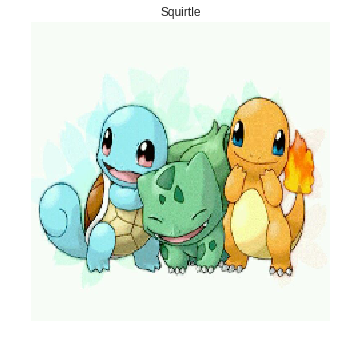

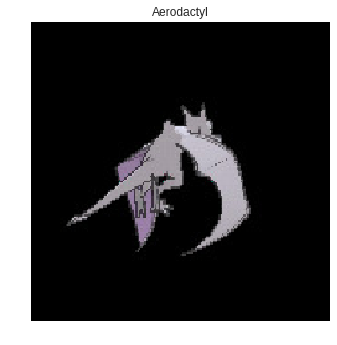

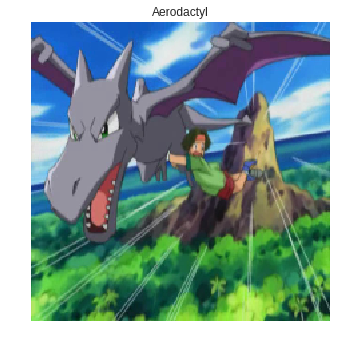

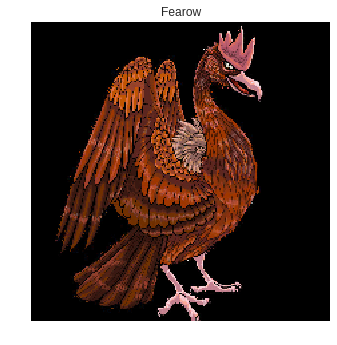

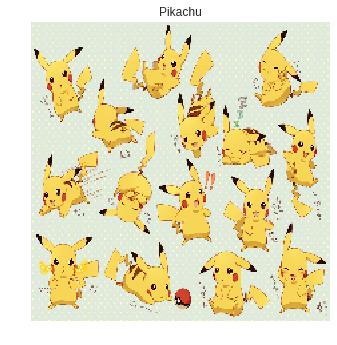

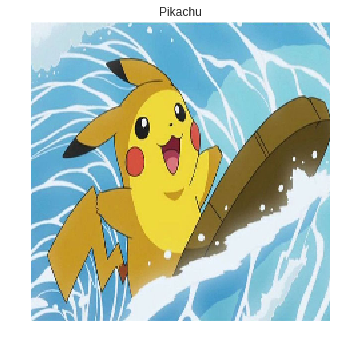

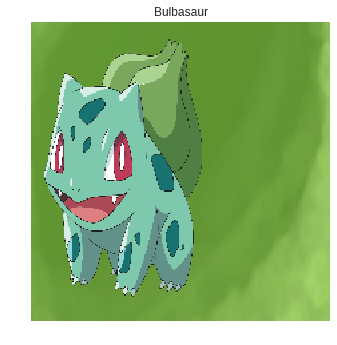

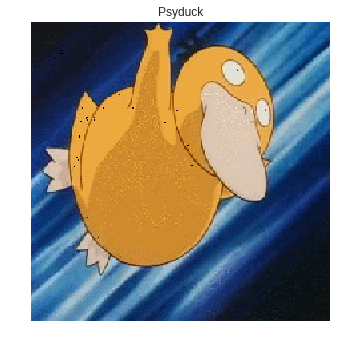

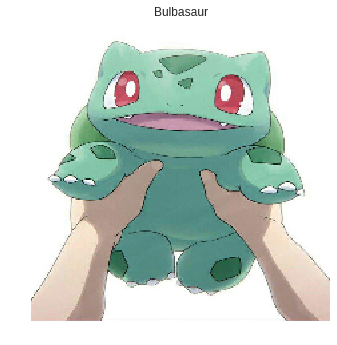

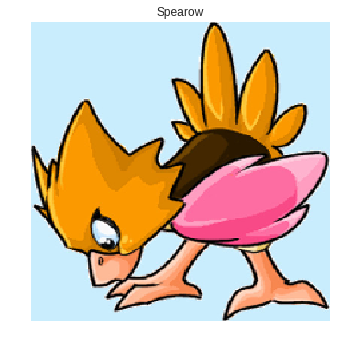

In [40]:
for i in range(10):
  int_random=np.random.randint(0,X.shape[0])
  Drawimg(X[int_random]/255.0,Y[int_random])

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(1252, 224, 224, 3) (313, 224, 224, 3)
(1252, 10) (313, 10)


In [0]:
from keras.models import Sequential
from keras.layers import Input,MaxPooling2D,Flatten,Dense,Dropout,Conv2D,ZeroPadding2D,Activation
from keras.utils import np_utils

from keras.layers.normalization import BatchNormalization

In [61]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_10 (Activation)   (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_11 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 256)         0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [64]:
hist=model.fit(X_train,Y_train,epochs=50,batch_size=256,shuffle=True,validation_split=0.2)

Train on 1001 samples, validate on 251 samples
Epoch 1/50
1001/1001 [==============================] - 2s 2ms/step - loss: 0.1410 - acc: 0.9491 - val_loss: 2.0383 - val_acc: 0.7171
Epoch 2/50
1001/1001 [==============================] - 2s 2ms/step - loss: 0.1265 - acc: 0.9560 - val_loss: 5.0183 - val_acc: 0.4701
Epoch 3/50
1001/1001 [==============================] - 2s 2ms/step - loss: 0.1256 - acc: 0.9590 - val_loss: 4.1845 - val_acc: 0.5100
Epoch 4/50
1001/1001 [==============================] - 2s 2ms/step - loss: 0.1312 - acc: 0.9510 - val_loss: 4.2483 - val_acc: 0.5378
Epoch 5/50
1001/1001 [==============================] - 2s 2ms/step - loss: 0.1424 - acc: 0.9491 - val_loss: 2.4371 - val_acc: 0.6494
Epoch 6/50
1001/1001 [==============================] - 2s 2ms/step - loss: 0.0980 - acc: 0.9630 - val_loss: 3.0589 - val_acc: 0.6255
Epoch 7/50
1001/1001 [==============================] - 2s 2ms/step - loss: 0.1170 - acc: 0.9650 - val_loss: 2.3424 - val_acc: 0.6733
Epoch 8/50
1001

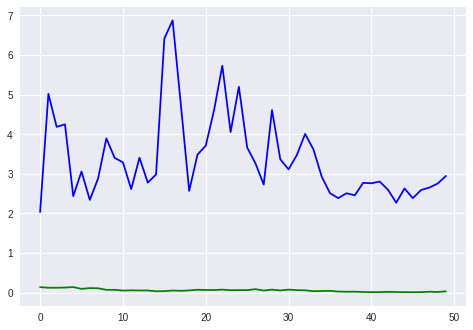

In [65]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')

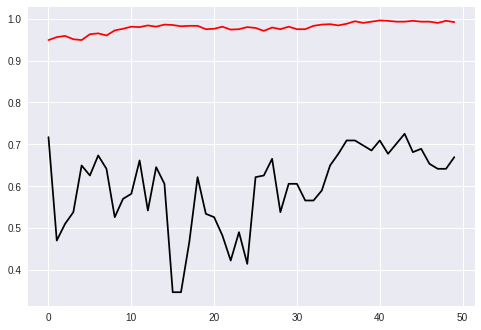

In [66]:
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')
plt.show()

In [67]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step


[2.890215129517138, 0.6773162931679918]

In [72]:
model.predict(X_test)


array([[4.2213378e-06, 2.4207108e-07, 9.9910790e-01, ..., 6.1156589e-07,
        5.0662440e-04, 3.2518590e-06],
       [2.3834515e-01, 4.5570872e-05, 3.8944372e-06, ..., 5.0377339e-06,
        4.8662811e-03, 2.3067683e-04],
       [2.9215741e-03, 8.9113883e-11, 1.4506290e-06, ..., 1.6080336e-10,
        4.4655502e-03, 9.2896535e-10],
       ...,
       [2.7634026e-06, 8.9731184e-10, 6.7353126e-06, ..., 1.8273588e-09,
        9.9999011e-01, 2.7925242e-09],
       [4.0595492e-06, 1.1516569e-09, 2.6392244e-04, ..., 9.9973065e-01,
        5.3492278e-07, 3.0454327e-08],
       [5.9541765e-08, 1.1870941e-07, 1.6648202e-04, ..., 9.8261988e-01,
        1.7187620e-02, 7.8110936e-08]], dtype=float32)